In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing, cross_validation
from mlxtend.plotting import plot_decision_regions

In [3]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
pd.DataFrame(y_xor)

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


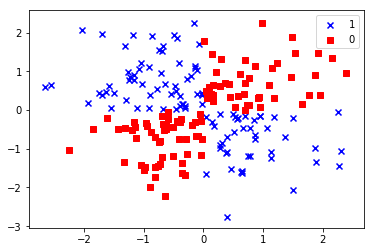

In [4]:
%matplotlib inline
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c = 'r', marker = 's', label = '0')
plt.legend(loc = 'best')
plt.show()

In [5]:
X_std = X_xor
z = y_xor

In [6]:
clf_result = linear_model.SGDClassifier(loss = "hinge")
clf_result.fit(X_std, z)

c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
scores = cross_validation.cross_val_score(clf_result, X_std, z, cv = 10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.549035087719
正解率の標準偏差 =  0.0848091388218


c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [8]:
X_train, X_test, train_label, test_label = cross_validation.train_test_split(X_std, z, test_size = 0.1, random_state = 0)
clf_result.fit(X_train, train_label)
pre = clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label, pre)
print("正答率 = ", ac_score)

正答率 =  0.45


c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


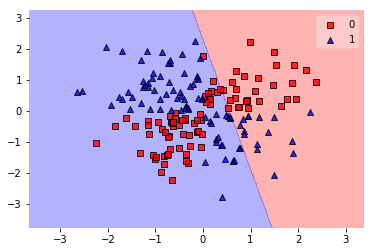

In [9]:
X_train_plot = np.vstack(X_train)
train_label_plot = np.hstack(train_label)
X_test_plot = np.vstack(X_test)
test_label_plot = np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf = clf_result, res = 0.01)

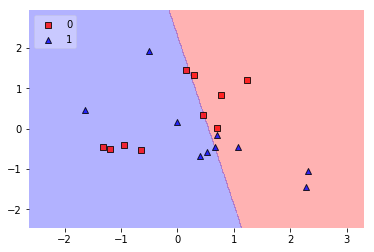

In [10]:
plot_decision_regions(X_test_plot, test_label_plot, clf = clf_result, res = 0.01, legend = 2)